We are going to use NILEARN to plot a bunch of brain images. Let's create a mental model of what we are doing.

Pretty much everything we want to work with is a volumetric image file in the NIfTI (Neuroimaging Informatics Technology Initiative) format usually with extension .nii or .nii.gz. We use this format not just for brain images, but also for labels, masks etc, but let's step back a second.

When you image a brain with an MRI scanner you get a 3D array of voxels (little cubes) with intensity values. Imagine a large cuboid full of smaller cubes, each containing a number.

For a real MRI scan each cube isn't floating in abstract array land. Each voxel corresponds to a location in actual physical space. Different scanners have different: voxel sizes, orientations, coordinate origins, slice directions, and patient positioning. So NIfTI needs to store: (i) the voxel data, and (ii) how to interpret the voxel data in physical space in real-world millimetres. To store a single MRI in a NIfTI image we'll typically have:

1. A header containing:
    a. The dimensions of the voxel grid (X,Y,Z) for example 182 x 182 x 182
    b. Voxel size in mm for each dimension, for example 1mm x 1mm x 1mm
    c. Scale, rotation, and translation (affine transformation) to orient the image in a known frame of reference
2. The 3D block of voxel intensity data itself

This allows software to interpret the voxel data and plot it in 3D realistically. Note that scale is stored redundantly in the header as both a voxel size array and in the affine transformation as scale for historical reasons.

Now since every MRI scan has a slightly different scaling, rotation, translation, resolution etc this isn't particularly useful if we want to compare brain images, even if we can represent them as valid NIfTI files.

For this reason the neuroimaging community has standardised coordinate systems so that everyone can produce images that line up with each other. This allows us to overlay images with labels or masks, and compare images directly.

The canonical coordinate system has the abbreviation MNI (Montreal Neurological Institute) from whence it came. This is bundled with a brain image in that coordinate system to provide a base brain image and we call this a template.

The canonical template is called MNI152 and is a composite of 152 MRIs of different brains that have been transformed and warped to overlay each other and then the intensities are averaged. This gives a template which is a kind of "average brain" in the MNI coordinate space.

Now you'll be able to undersand exactly what I'm doing below:


In [1]:
# load in the required libraries from nilearn
from nilearn import datasets, plotting

# load the MNI 152 template
mni = datasets.load_mni152_template()

# plot it using the builtin function
plotting.plot_anat(mni)

That plots a static image of our template. We can also generate an interactive plot by using plotting.view_img. Note that plotting.view_img is designed to plot an overlay on top of a base image, so you'll see that there is a bg_img paramater which we'll set to None, but typically we'd actually set that to the MNI image or whatever we want our background image to be.


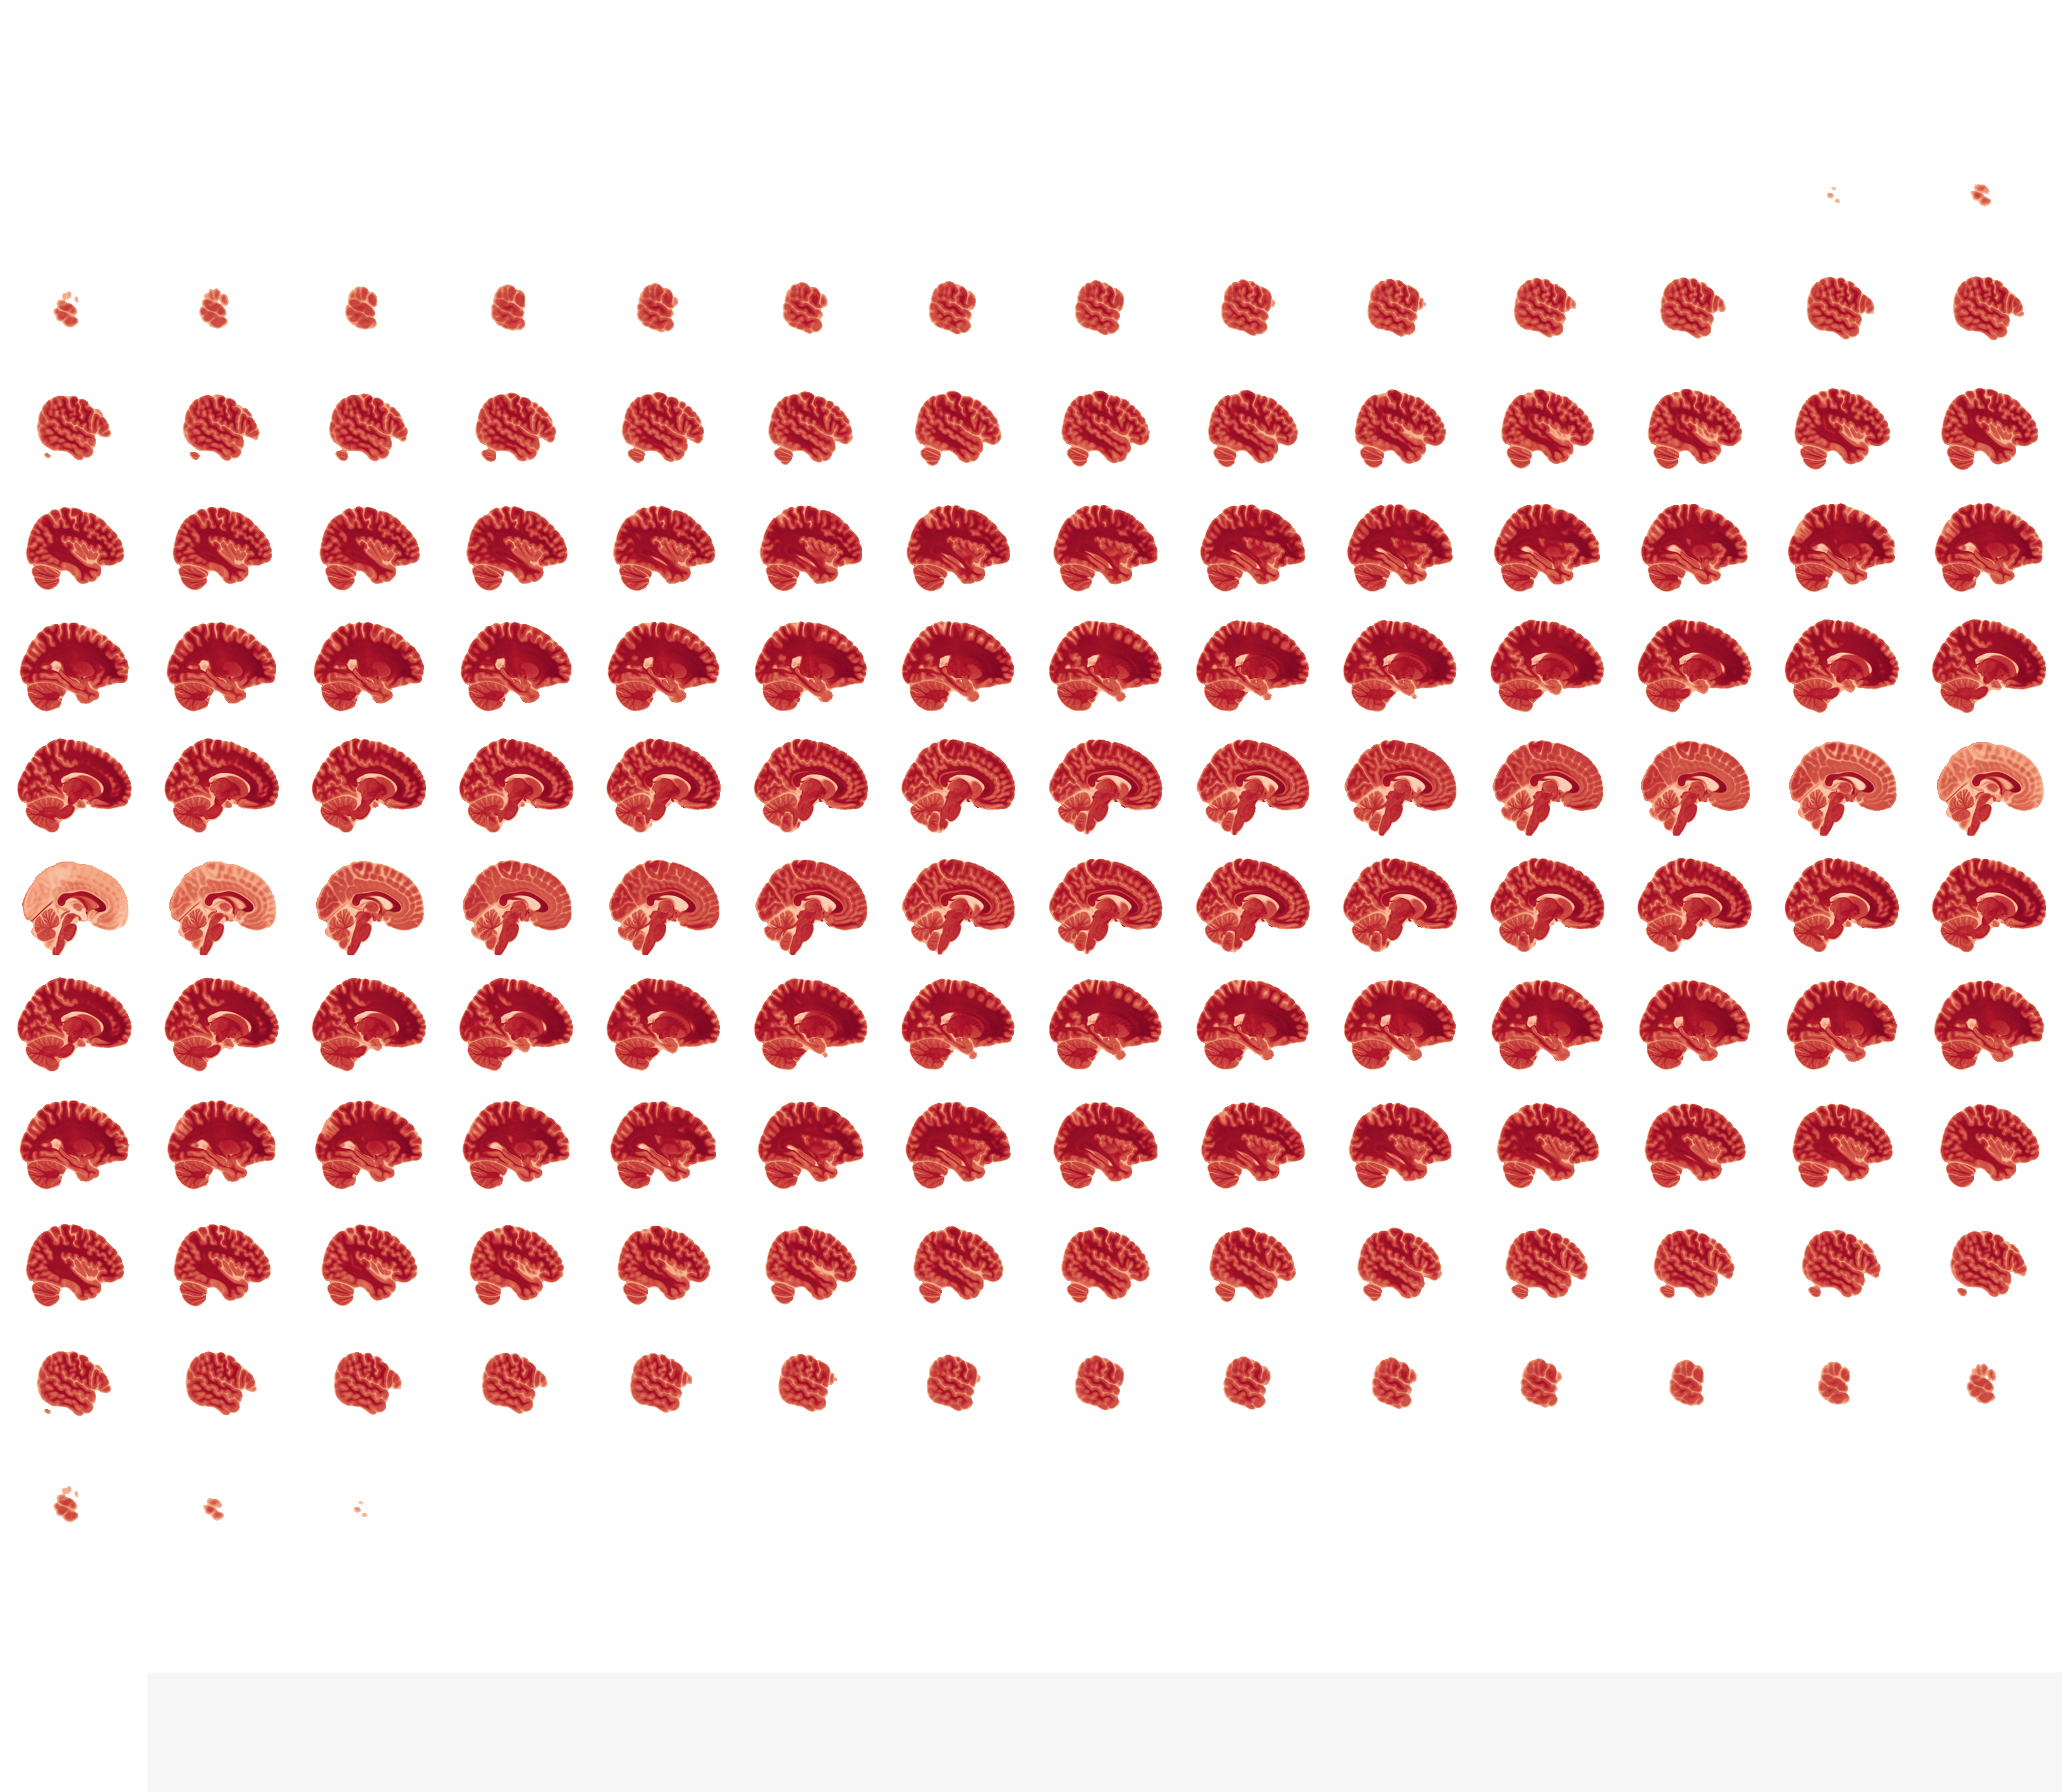

In [4]:
plotting.view_img(mni,bg_img=None,colorbar=None)